In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("retail_data.csv", encoding='latin-1')

In [3]:
df.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df['Allocation Status'].value_counts()

Dealer    165
Direct     64
Name: Allocation Status, dtype: int64

In [5]:
df.shape

(229, 40)

In [6]:
df_dealer = df[df['Allocation Status']=='Dealer']

In [7]:
df_dealer['Allocation Status'].value_counts()

Dealer    165
Name: Allocation Status, dtype: int64

In [11]:
df_dealer['Dealer Name'].value_counts()

Windoors      45
Sunbird       33
Winfratech    20
OXXO          20
Pearlson      15
Rajtechnis    15
ITP           13
Direct         4
Name: Dealer Name, dtype: int64

In [10]:
df_dealer['Dealer Name'].replace(to_replace='pearlson',value='Pearlson',inplace=True)

C:\Users\Rakesh Sriramula\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [12]:
df_dealer = df_dealer[df_dealer['Dealer Name']!='Direct']

In [13]:
df_dealer['Dealer Name'].value_counts()

Windoors      45
Sunbird       33
Winfratech    20
OXXO          20
Pearlson      15
Rajtechnis    15
ITP           13
Name: Dealer Name, dtype: int64

In [14]:
# Total there are 7 dealers 

In [15]:
pd.crosstab(df_dealer['Dealer Name'],df_dealer['Status'])

Status,Lost,Won
Dealer Name,,
ITP,13,0
OXXO,16,4
Pearlson,11,4
Rajtechnis,14,1
Sunbird,24,9
Windoors,39,6
Winfratech,18,2


In [40]:
Conversion_rate = pd.crosstab(df_dealer['Dealer Name'],df_dealer['Status']).apply(lambda r:r/r.sum(),axis=1)

In [41]:
Conversion_rate

Status,Lost,Won
Dealer Name,,
ITP,1.000000,0.000000
OXXO,0.800000,0.200000
Pearlson,0.733333,0.266667
Rajtechnis,0.933333,0.066667
Sunbird,0.727273,0.272727
Windoors,0.866667,0.133333
Winfratech,0.900000,0.100000


In [ ]:
# Sunbird is having a Good Conversion ratio 

In [18]:
import seaborn as sns

Text(0.5, 1.0, 'Order Won/Loast by Dealers')

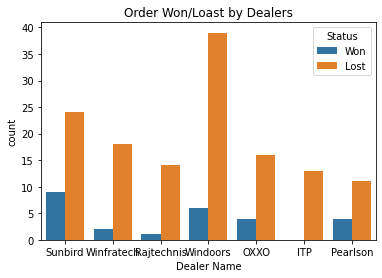

In [26]:
sns.countplot(x= 'Dealer Name',hue='Status',data=df_dealer).set_title('Order Won/Loast by Dealers')

In [27]:
df_dealer[df_dealer['Dealer Name']=='Sunbird']['Q Val. (Rs. Lac)'].sum()

46.41

In [29]:
Price_Quotation_dealer_wise = pd.Series()
for i in df_dealer['Dealer Name'].unique():
    Price_Quotation_dealer_wise[i]=df_dealer[df_dealer['Dealer Name']==i]['Q Val. (Rs. Lac)'].sum()
    

<ipython-input-29-2ce4c70e8fa5>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Price_Quotation_dealer_wise = pd.Series()


In [30]:
Price_Quotation_dealer_wise

Sunbird       46.41
Winfratech    16.62
Rajtechnis    14.81
Windoors      69.82
OXXO          26.49
ITP           17.45
Pearlson      15.89
dtype: float64

In [31]:
Orders_each_dealer_received = pd.Series()
for i in df_dealer['Dealer Name'].unique():
    Orders_each_dealer_received[i]=df_dealer[df_dealer['Dealer Name']==i]['Status'].count()

<ipython-input-31-90a99d17cb09>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Orders_each_dealer_received = pd.Series()


In [32]:
Orders_each_dealer_received

Sunbird       33
Winfratech    20
Rajtechnis    15
Windoors      45
OXXO          20
ITP           13
Pearlson      15
dtype: int64

<AxesSubplot:>

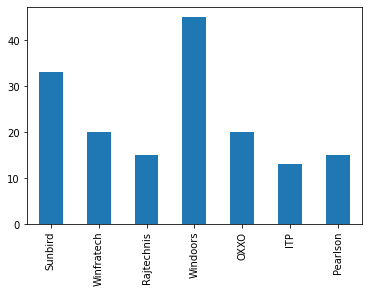

In [36]:
Orders_each_dealer_received.plot(kind='bar')

In [ ]:
# Windoors have received highest number of orders and ITP received the least number of orders

In [33]:
Order_value_each_dealer_received = pd.Series()
for i in df_dealer['Dealer Name'].unique():
    Order_value_each_dealer_received[i]=df_dealer[df_dealer['Dealer Name']==i]['Order Val. (Rs. Lac)'].sum()

<ipython-input-33-563ae2f4c8a1>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Order_value_each_dealer_received = pd.Series()


In [34]:
Order_value_each_dealer_received

Sunbird       10.30
Winfratech     2.11
Rajtechnis     0.53
Windoors      11.54
OXXO           7.39
ITP            0.00
Pearlson      13.77
dtype: float64

In [37]:
Order_value_each_dealer_received.describe()

count     7.000000
mean      6.520000
std       5.636884
min       0.000000
25%       1.320000
50%       7.390000
75%      10.920000
max      13.770000
dtype: float64

<AxesSubplot:>

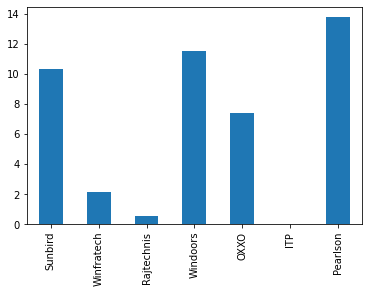

In [35]:
Order_value_each_dealer_received.plot(kind='bar')

In [ ]:
We found Conversion rate dealers who are having least conversion rate are the underperforming dealers



In [42]:
Conversion_rate['Won'].describe()

count    7.000000
mean     0.148485
std      0.102777
min      0.000000
25%      0.083333
50%      0.133333
75%      0.233333
max      0.272727
Name: Won, dtype: float64

In [ ]:
Now we can find the under performers in 2 ways by looking at their CONVERSION_RATE and ORDER_VALUE :
    
For one dealer to be decided as a good performer he needs to maintain an average conversion rate of 14%  
at the same time his OrderValue should be more than 6.5 lakhs 


In [43]:
Conversion_rate

Status,Lost,Won
Dealer Name,,
ITP,1.000000,0.000000
OXXO,0.800000,0.200000
Pearlson,0.733333,0.266667
Rajtechnis,0.933333,0.066667
Sunbird,0.727273,0.272727
Windoors,0.866667,0.133333
Winfratech,0.900000,0.100000


In [44]:
Order_value_each_dealer_received

Sunbird       10.30
Winfratech     2.11
Rajtechnis     0.53
Windoors      11.54
OXXO           7.39
ITP            0.00
Pearlson      13.77
dtype: float64

In [ ]:

Sunbird, Oxxo, Pearlson are top performers 


Windoors good performer 

ITP & rajtechnics